# **Python para análise de dados - Análise de inadimplência**

*Este Projeto tem como objetivo demonstrar o processo de análise de dados de uma instituição financeira para concessão de crédito*

## 1\. Importação das Bibliotecas e do DataFrame

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

## 2\. Análise Exploratória

In [3]:
df.head(n=3)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20


### 2.1 Carregando as variáveis chave da análise

In [5]:
base_total, _  = df.shape # dimensõeos da base

In [6]:
base_adimplentes, _  = df[df['default'] == 0].shape # tamanho da base de adinplentes

In [7]:
base_inadimplentes, _  = df[df['default'] == 1].shape # tamanho da base de inadinplentes

In [8]:
percentual = lambda v_parcial, v_total : round(100 * v_parcial / v_total , 2) # função que calcula o percentual sobre o montante total

In [9]:
print(f'A base conta com {base_total} registros')
print(f'A proporção de adimplentes da base é de: {percentual(base_adimplentes, base_total)} %')
print(f'A proporção de inadimplentes da base é de: {percentual(base_inadimplentes, base_total)} %')

A base conta com 10127 registros
A proporção de adimplentes da base é de: 83.93 %
A proporção de inadimplentes da base é de: 16.07 %


### 2.2 Conferindo os tipos dos dados

In [10]:
df.dtypes # imprime os tipos de dados de cada coluna do df

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

### 2.3 Conferindo as variáveis categóricas

Nesta sessão obtemos mais informações sobre as variáveis categóricas, observamos que as colunas 'escolaridade', 'estado_civil' e 'salario_anual' tem menos registros do que o total de linhas da base

In [11]:
# df.select_dtypes('object') imprime somente colunas categóricas (object)
# .describe() aninha os registros de acordo com a quantidade em que eles aparecem na base
# .transpose() transpõe as colunas para linha

df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


### 2.4 Conferindo as variáveis numéricas

Nesta sessão obtemos mais informações sobre as variáveis numéricas do nosso DataFrame, entre outros indicadores obtemos a contagem de registros, que nos informa que não temos dados faltantes para essas colunas

In [12]:
# .drop('id', axis=1) dropa a coluna "id" do df
# df.select_dtypes('number') imprime somente colunas numéricas (number)
# .describe() aninha os registros de acordo com a quantidade em que eles aparecem na base
# .transpose() transpõe as colunas para linha

df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### 2.5 Conferindo as colunas com dados faltantes

#### 2.5.1 Identificando dados faltantes

Obtemos o valor 'True' para coluna que não tiver pelo menos um registro em todo Dataset

In [13]:
df.isna().any() # true para dados faltantes

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

#### 2.5.2 Sumarizando dados faltantes

Esta função nos informa através de texto a quantidade de dados faltantes para cada coluna e qual a proprção desta falta de dados para a base como um todo

In [14]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:


    for col in df.columns: # percorre cada coluna do DataFrame
        if df[col].isna().any(): # se a coluna conter algun dado faltante...
            qtd, _ = df[df[col].isna()].shape # armazene a quantidade faltante
            total, _ = df.shape # armazene a quantidade total de registros da coluna
            print(f'A coluna "{col}" contém {qtd} registros nulos, representando um total de {percentual(qtd, total)}% ')


In [15]:
# informações do DataFrame inteiro
stats_dados_faltantes(df = df)

A coluna "escolaridade" contém 1519 registros nulos, representando um total de 15.0% 
A coluna "estado_civil" contém 749 registros nulos, representando um total de 7.4% 
A coluna "salario_anual" contém 1112 registros nulos, representando um total de 10.98% 


In [16]:
# informações do DataFrame apenas de clientes inadimplentes
stats_dados_faltantes(df = df[df['default'] == 1])

A coluna "escolaridade" contém 256 registros nulos, representando um total de 15.73% 
A coluna "estado_civil" contém 129 registros nulos, representando um total de 7.93% 
A coluna "salario_anual" contém 187 registros nulos, representando um total de 11.49% 


In [17]:
# informações do DataFrame apenas de clientes adimplentes
stats_dados_faltantes(df = df[df['default'] == 0])

A coluna "escolaridade" contém 1263 registros nulos, representando um total de 14.86% 
A coluna "estado_civil" contém 620 registros nulos, representando um total de 7.29% 
A coluna "salario_anual" contém 925 registros nulos, representando um total de 10.88% 


## 3\. Tratamento de dados

O Pandas infere automaticamente os tipos dos dados das colunas de acordo com seus valores, porém aqui temos um problema, algumas colunas que deveriam ser tratadas como se contesse valores float estão sendo reconhecidas como object que para o Pandas corresponde a strings

In [18]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

Isso se deve ao fato dos valores estarem sendo representados no formato brasileiro, ou seja, ponto(.) como separador de milhar e vírgula(,) como separador decimal.

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].head(3)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"


Esta função aplica o replace() do python nessas colunas resolvendo esse problema de pontuação

In [20]:
# define uma função que trata a pontuação dos numeros
fn = lambda valor: float(valor.replace(".","").replace(",", "."))

In [21]:
# aplicando a função nas colunas do DataFrame
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [22]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [23]:
df[['limite_credito', 'valor_transacoes_12m']].head(3)

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72


Conferindo novamente o nosso DataFrame e os tipos de dados reconhecidos pelo Pandas

In [24]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Observando as colunas que descrevem atributos qualitativos da nossa base

In [25]:
# atributos categoricos
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


Observando as colunas que descrevem atributos quantitativos da nossa base

In [26]:
#atributos numericos
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


Removendo valores faltantes da nossa base

In [27]:
# removendo registros com valores faltantes
df.dropna(inplace=True)

Dando uma olhada de como ficou a base e as proporções dos dados depois que os valores nulos foram excluidos

In [28]:
base_total_limpa, _ = df.shape
base_adimplentes_limpa, _ = df[df['default'] == 0].shape
base_inadimplentes_limpa, _ = df[df['default'] == 1].shape
print(f'A base inicial continha: "{base_total}" registros, já a base limpa de registros faltantes contém: "{base_total_limpa}" registros totais')
print(f'A base inicial continha: "{base_adimplentes}" registros adimplentes, agora são "{base_adimplentes_limpa}" registros')
print(f'A base inicial continha: "{base_inadimplentes}" registros inadimplentes, agora são "{base_inadimplentes_limpa}" registros')
print('\n')
print(f'Adimplentes eram: {percentual(base_adimplentes, base_total)}%, agora são {percentual(base_adimplentes_limpa, base_total_limpa)}% da base total')
print(f'Inadimplentes eram: {percentual(base_inadimplentes, base_total)}%, agora são {percentual(base_inadimplentes_limpa, base_total_limpa)}% da base total')


A base inicial continha: "10127" registros, já a base limpa de registros faltantes contém: "7081" registros totais
A base inicial continha: "8500" registros adimplentes, agora são "5968" registros
A base inicial continha: "1627" registros inadimplentes, agora são "1113" registros


Adimplentes eram: 83.93%, agora são 84.28% da base total
Inadimplentes eram: 16.07%, agora são 15.72% da base total


## 4\. Visualização de dados

Aqui temos 2 funções a primeira "categorical_plot" cria um gráfico para variáveis categoricas já a segunda "numerical_plot" cria um gráfico para variáveis numéricas

In [29]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

def categorical_plot(coluna : str, titulos : list):
    eixo = 0
    max_y = 0

    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:

        df_to_plot = dataframe[coluna].value_counts().to_frame()
        df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
        df_to_plot[coluna] = df_to_plot.index
        df_to_plot.sort_values(by=[coluna], inplace=True)

        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=40)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    figura.show()

def numerical_plot(coluna : str, titulos : list):
    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:

        f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    figura.show()

### 4.1 Analisando as variaveis categóricas

Com os gráficos dos dados total, amostra dos adimplentes e amostra dos inadinplentes, podemos concluir que essa coluna não é capaz de explicar o default = 1, ou seja a inadimplência

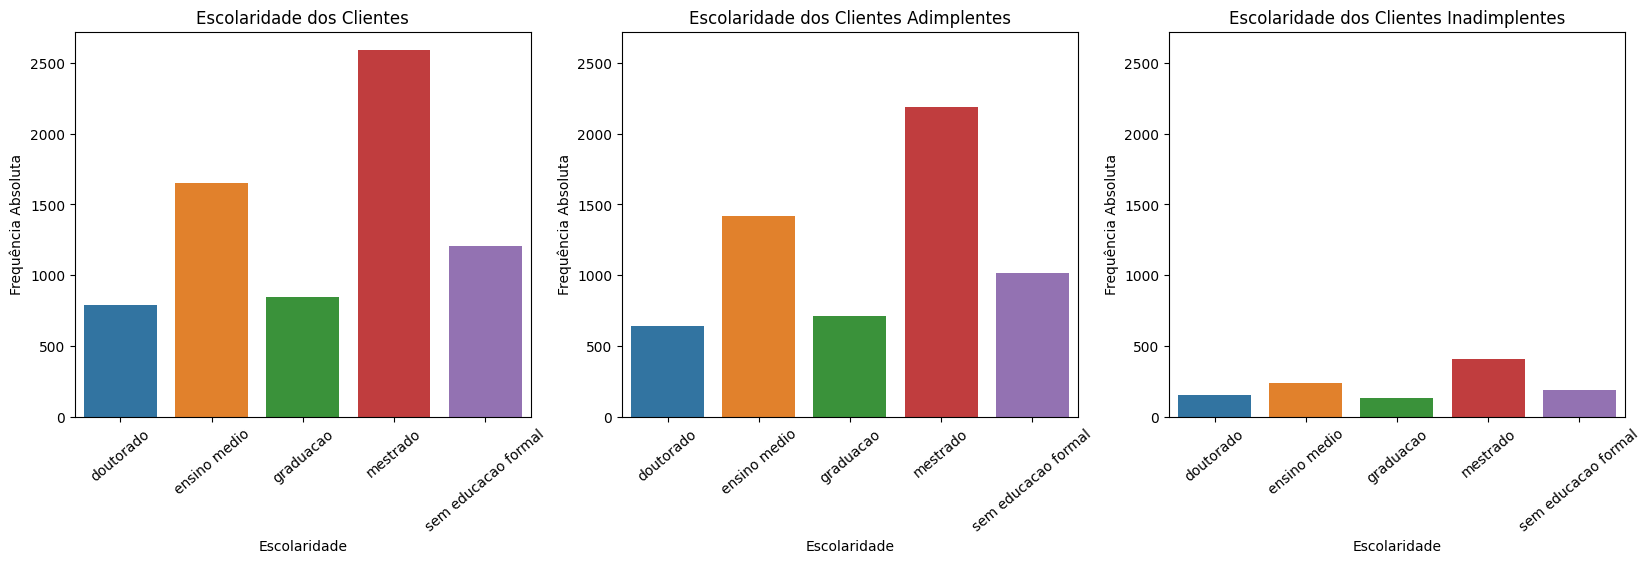

In [30]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
categorical_plot(coluna, titulos)

Salario anual também não pode nos explicar a provavel causa para a inadimplência

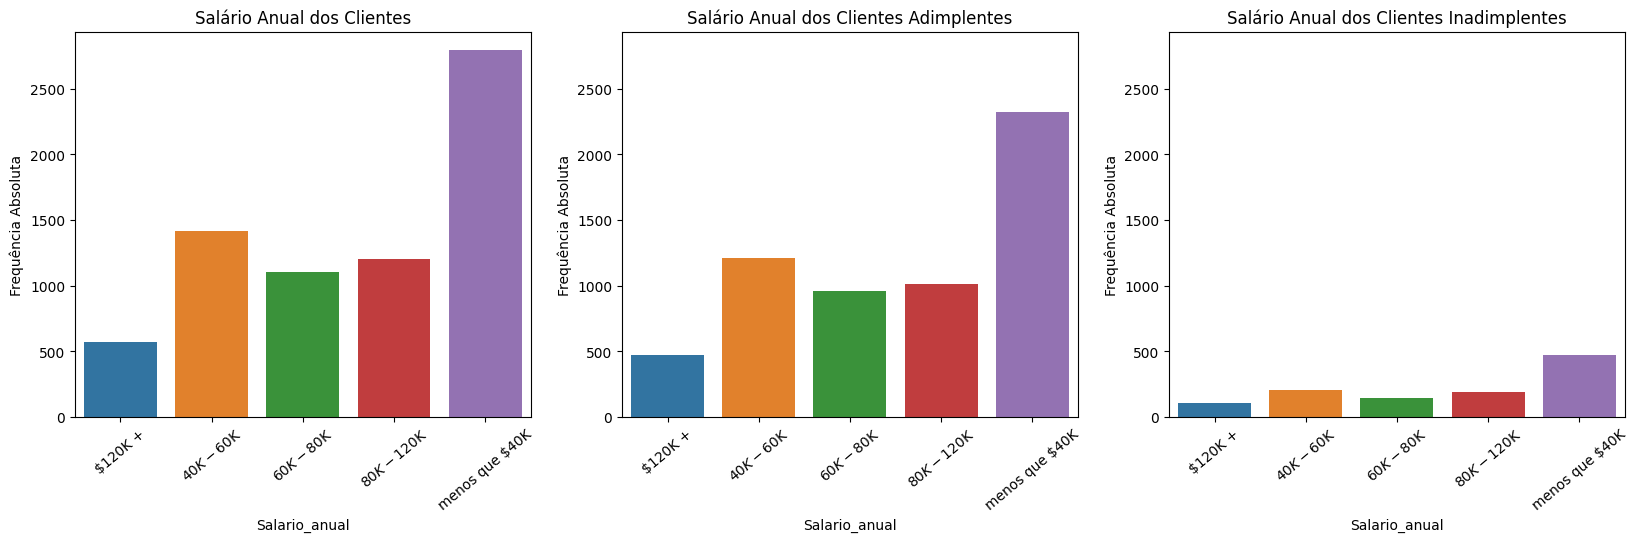

In [31]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']
categorical_plot(coluna, titulos)

### 4.2 Analisando as variaveis numéricas

Verificando o nosso Dataset

In [32]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


✅ Quando plotamos a quantidade de transações anuais os dados parecem desenhar um padrão, os clientes que cometem o default parecem se concentrar na região de 20 a 60 transações anuais

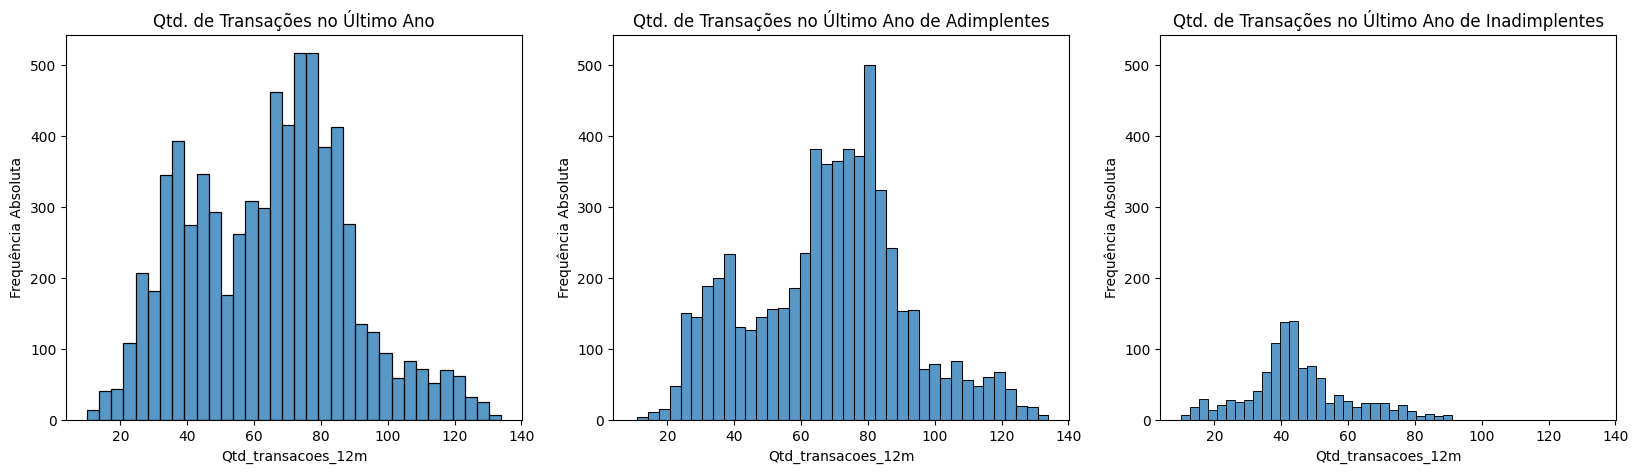

In [33]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']
numerical_plot(coluna, titulos)

✅ Com relação ao valor das transações outro padrão salta aos olhos, a maioria dos clientes que cometem inadimplência se situam entre o valor de 2500

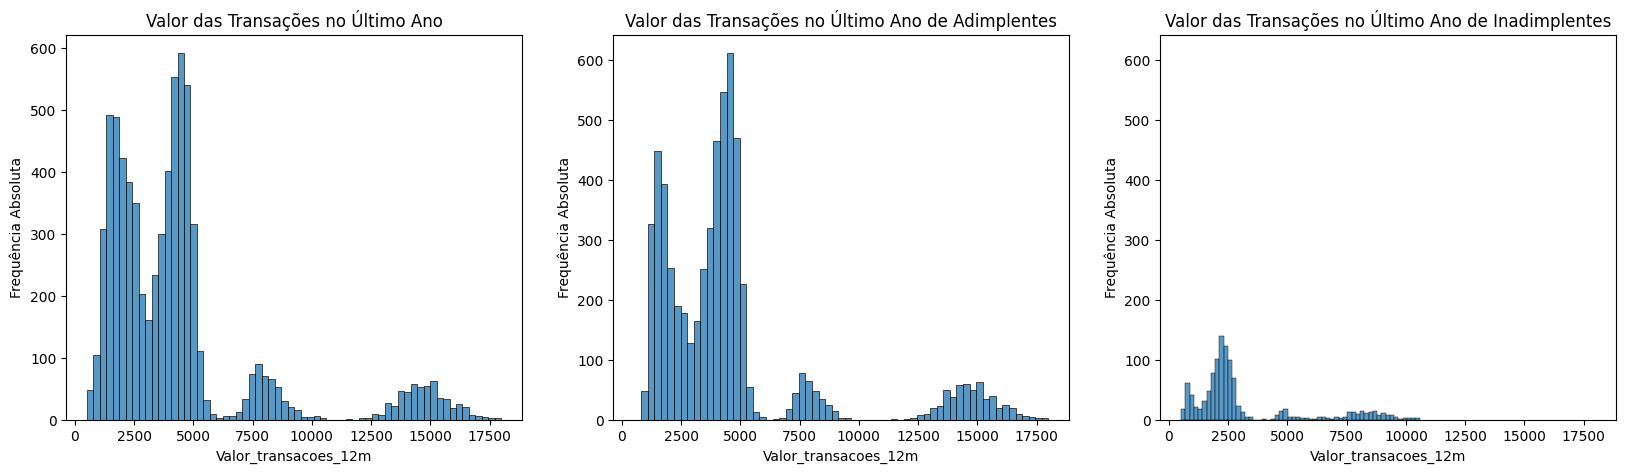

In [34]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']
numerical_plot(coluna, titulos)

🥇 Encontramos nosso *insight* que procuravamos, contrastando a quantidade de transações anuais e valor dessas transações, obtivemos um agrupamento marcante desses dados, mostrando qual a faixa de clientes que devemos ter mais atenção com relação a inadimplência

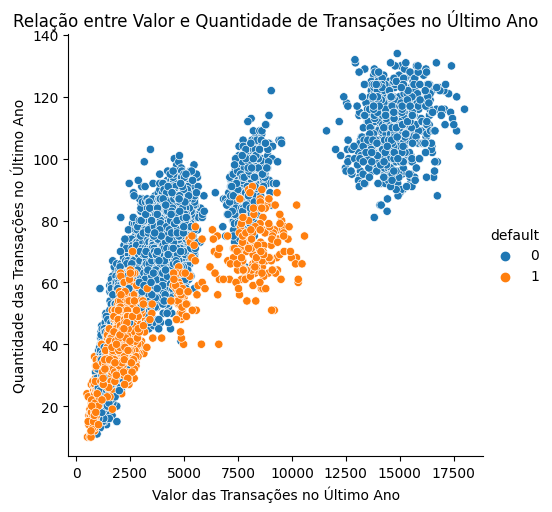

In [35]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

## 5\. Resumo e *insight* gerados

Ao final, concluimos que o passo de análise exploratória dos dados é crucial para nos direcionar durante o processo de manipulação dos dados, ajuda a decidir se com essa falta de dados nossa análise fica comprometida e se podemos simplismente descartá-los, ou devemos mantê-los e tratarmos da melhor forma possível a fim que não comprometam a coerência da análise.
No caso que analisamos, o fato de descartar os dados em branco não afeta significativamente a composição percentual da base, pois adimplentes eram: 83.93%, após a exclusão são 84.28% da base total e inadimplentes eram: 16.07% e depois 15.72% da base total, assim mantendo basicamente o mesmo balanceamento entre adimplentes e inadimplentes do que o da base original.
Ao plotar os dados de adimplentes e inadimplentes segundo sua escolaridade e depois segundo sua renda anual, notamos que esses fatores não explicam a inadimplência pois as duas bases se mantém com a mesma proporcionalidade com relação a base original, porém quando confrontamos com o número de transações anuais e valor dessas transações por ano, fica evidente que clientes inadimplentes se situam em uma região bem específica do gráfico e depois de plotar essas duas variáveis em um grafico de disperção de pontos evidênciando por cores adimplentes e inadimplentes, notamos que esse tipo de default de concentra nos clientes que fazem até 90 transações anuais com o valor máximo nas proximidades de 10.000.